In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [2]:
inputfile = "member.uid___A001_X2d20_X39ab.Cloverleaf_sci.spw25.cube.I.pbcor.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-07-16-51-00.tsv"
df = pd.read_csv(inputfile, sep="\t", skiprows=5)

In [3]:
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors="coerce")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")

df = df.dropna()

x = df[df.columns[0]]
y = df[df.columns[1]] *1000 # Convert to mJy/beam



In [4]:
my_lines = [
    (97.18831, "CO v=0(3-2)")
    #,(96.369, "CS v=0")
]

#template_lines = [()]

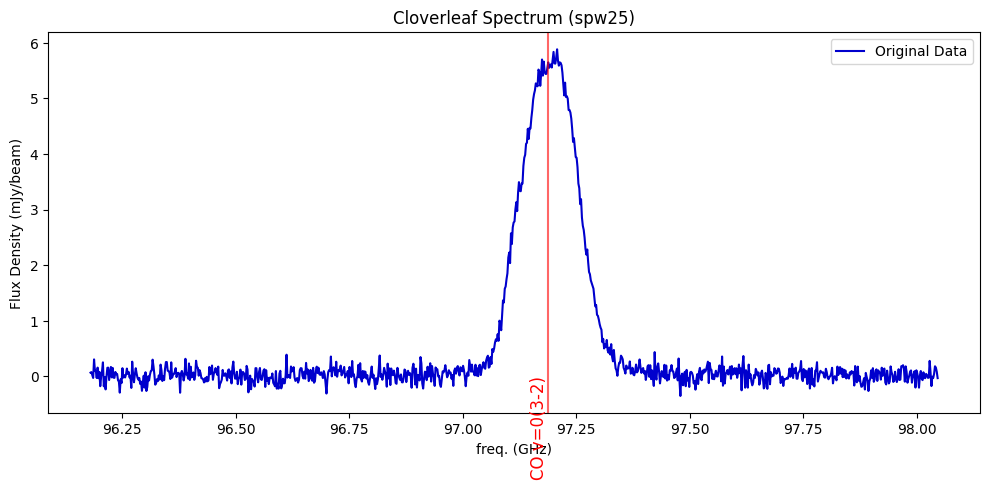

In [5]:
#沒平滑過的
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Original Data", color="mediumblue")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(df[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()      
plt.tight_layout()
plt.show()

In [6]:
""""
plt.figure(figsize=(10, 5))

mask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)
df_limited = df[mask]

df_limited[df.columns[1]] = df_limited[df.columns[1]] * 1000  # Convert to mJy/beam

plt.plot(df_limited[df.columns[0]], df_limited[df.columns[1]],
         label="Original Data", color="mediumblue")

    
for freq, label in my_lines:
    if freq <= 97:
        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
        plt.text(freq, max(df_limited[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')


plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()
"""

'"\nplt.figure(figsize=(10, 5))\n\nmask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)\ndf_limited = df[mask]\n\ndf_limited[df.columns[1]] = df_limited[df.columns[1]] * 1000  # Convert to mJy/beam\n\nplt.plot(df_limited[df.columns[0]], df_limited[df.columns[1]],\n         label="Original Data", color="mediumblue")\n\n\nfor freq, label in my_lines:\n    if freq <= 97:\n        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)\n        plt.text(freq, max(df_limited[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha=\'right\', va=\'top\')\n\n\nplt.xlabel("freq. (GHz)")\nplt.ylabel("Flux Density (mJy/beam)")\nplt.title("Cloverleaf Spectrum (spw25)")\nplt.grid(False)\nplt.legend()\nplt.tight_layout()\nplt.show()\n'

### 先用boxcar

In [7]:
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(y, kernel, mode="same")

y_boxcar = boxcar_smooth(y, kernel_size=4)

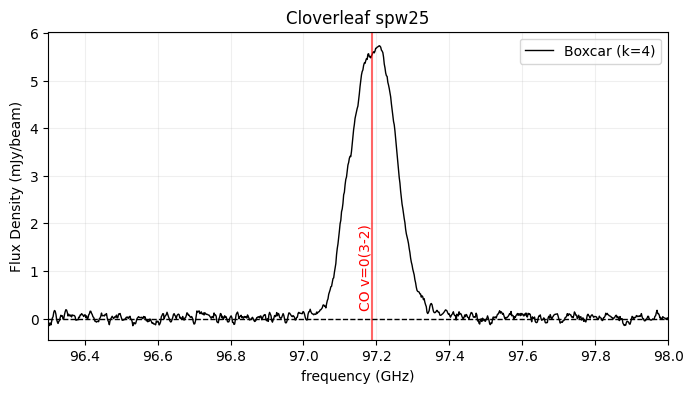

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=4)")
for freq, label in my_lines:
    if freq >= 97:
        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
        plt.text(freq, max(y_boxcar)*0.35, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("frequency (GHz)")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf spw25")
plt.xlim(96.3, 98)
plt.grid(True, alpha=0.2)
plt.legend()

In [9]:
#boxcar不夠用
#先加入binning
"""
def rebin_spectrum(x, y, bin_size):
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned



########################################################
#定義顯示的位置
mask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)
df_limited = df[mask]

x_binned, y_binned = rebin_spectrum(df_limited[df.columns[0]].values, df_limited[df.columns[1]].values, bin_size=2)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=2) * 1000  # Convert to mJy/beam

#建立一個新的DataFrame
df_limited_smoothed = pd.DataFrame({df.columns[0]: x_binned, df.columns[1]: y_binned_boxcar})


plt.figure(figsize=(10, 3))
plt.plot(df_limited_smoothed[df.columns[0]], df_limited_smoothed[df.columns[1]],
         label="Spectrum", color="mediumblue")
#for freq, label in my_lines:
#   if freq <= 97:
#        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
#        plt.text(freq, max(df_limited[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')


plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw25)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()
"""

'\ndef rebin_spectrum(x, y, bin_size):\n    n_bins = len(y) // bin_size\n    x = x[:n_bins * bin_size]\n    y = y[:n_bins * bin_size]\n    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)\n    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)\n    return x_binned, y_binned\n\n\n\n########################################################\n#定義顯示的位置\nmask = (df[df.columns[0]] > 96.25) & (df[df.columns[0]] < 97)\ndf_limited = df[mask]\n\nx_binned, y_binned = rebin_spectrum(df_limited[df.columns[0]].values, df_limited[df.columns[1]].values, bin_size=2)\ny_binned_boxcar = boxcar_smooth(y_binned, kernel_size=2) * 1000  # Convert to mJy/beam\n\n#建立一個新的DataFrame\ndf_limited_smoothed = pd.DataFrame({df.columns[0]: x_binned, df.columns[1]: y_binned_boxcar})\n\n\nplt.figure(figsize=(10, 3))\nplt.plot(df_limited_smoothed[df.columns[0]], df_limited_smoothed[df.columns[1]],\n         label="Spectrum", color="mediumblue")\n#for freq, label in my_lines:\n#   if freq <= 97:\n#        plt.axvline(fre